In [2]:
!pip install -U sentence-transformers

     |████████████████████████████████| 71kB 5.1MB/s 
     |████████████████████████████████| 1.3MB 9.7MB/s 
     |████████████████████████████████| 1.1MB 22.9MB/s 
     |████████████████████████████████| 890kB 41.9MB/s 
     |████████████████████████████████| 2.9MB 43.0MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.9-cp36-none-any.whl size=101036 sha256=854d8a741e8899e97ab190d37f52a4b000e6288fb9bdd7c91cbb7fea03bc1124
  Stored in directory: /root/.cache/pip/wheels/fc/89/43/f2f5bc00b03ef9724b0f6254a97eaf159a4c4ddc024b33e07a
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=21021504341a71c2dc8bda0a71cae14109d1ee7a325b3e8004e51b04fa1bc338
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [3]:
import pandas as pd
import numpy as np
import os
import sys
import torch
import matplotlib.pyplot as plt
import pickle 
from sklearn.preprocessing import MultiLabelBinarizer
from skimage import io, transform
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from sentence_transformers import SentenceTransformer
import warnings
import pickle
warnings.filterwarnings('ignore')

In [4]:
from fastai import *
from fastai.text import *
import os
import sys
import torch
import matplotlib.pyplot as plt
import pickle 
from sklearn.preprocessing import MultiLabelBinarizer
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import warnings
warnings.filterwarnings('ignore')
from torchvision import models
import torch
import torch.nn as nn
from skimage import io, transform
import requests
from io import BytesIO
import ipywidgets as widgets
import re
from PIL import Image


In [5]:
embeddings_dict = pickle.load( open( "/content/drive/My Drive/EAST/Fashion_Data/Label_Embeddings.pkl", "rb" ) )

In [6]:
len(embeddings_dict)

184

In [7]:
np.array(embeddings_dict[['Red'][0]]).shape

(768,)

In [8]:
embeddings_dict.keys()

dict_keys(['Belts', 'Churidar', 'Boys', 'Key chain', 'Steel', 'Swimwear', 'Turquoise Blue', 'Rose', 'Fragrance', 'Mushroom Brown', 'Pendant', 'Shoes', 'Highlighter and Blush', 'Salwar', 'Innerwear Vests', 'Trousers', 'Orange', 'Sandal', 'Perfume and Body Mist', 'Mask and Peel', 'Copper', 'Gloves', 'Eyewear', 'Watches', 'Sweaters', 'Sports Shoes', 'Footwear', 'Travel', 'Sports Sandals', 'Skirts', 'Smart Casual', 'Summer', 'Off White', 'Heels', 'Maroon', 'Bags', 'Blue', 'Deodorant', 'Bra', 'Saree', 'Lips', 'Compact', 'Headband', 'Green', 'Beige', 'Free Items', 'Boxers', 'Sarees', 'Casual', 'Sunglasses', 'Dresses', 'Casual Shoes', 'Tan', 'Fragrance Gift Set', 'Face Moisturisers', 'Multi', 'Sports Accessories', 'Nude', 'Kajal and Eyeliner', 'Bracelet', 'Jewellery Set', 'Tshirts', 'Suspenders', 'Duffel Bag', 'Messenger Bag', 'Brown', 'Lipstick', 'Stoles', 'Ties', 'Tops', 'Night suits', 'Makeup', 'Nightdress', 'Sweatshirts', 'Men', 'Jeggings', 'Kurtas', 'Jackets', 'Rompers', 'Black', 'Capris

In [9]:
labels_list = list(sorted(embeddings_dict.keys())) #Sorts the list alphabetically

In [10]:
labels_list

['Accessories',
 'Accessory Gift Set',
 'Apparel',
 'Apparel Set',
 'Baby Dolls',
 'Backpacks',
 'Bags',
 'Bangle',
 'Bath Robe',
 'Beige',
 'Belts',
 'Black',
 'Blue',
 'Bottomwear',
 'Boxers',
 'Boys',
 'Bra',
 'Bracelet',
 'Briefs',
 'Bronze',
 'Brown',
 'Burgundy',
 'Camisoles',
 'Capris',
 'Caps',
 'Casual',
 'Casual Shoes',
 'Charcoal',
 'Churidar',
 'Clutches',
 'Coffee Brown',
 'Compact',
 'Copper',
 'Cream',
 'Cufflinks',
 'Deodorant',
 'Dress',
 'Dresses',
 'Duffel Bag',
 'Dupatta',
 'Earrings',
 'Ethnic',
 'Eyes',
 'Eyewear',
 'Face Moisturisers',
 'Face Wash and Cleanser',
 'Fall',
 'Flats',
 'Flip Flops',
 'Footballs',
 'Footwear',
 'Formal',
 'Formal Shoes',
 'Foundation and Primer',
 'Fragrance',
 'Fragrance Gift Set',
 'Free Gifts',
 'Free Items',
 'Girls',
 'Gloves',
 'Gold',
 'Green',
 'Grey',
 'Grey Melange',
 'Handbags',
 'Hat',
 'Headband',
 'Headwear',
 'Heels',
 'Highlighter and Blush',
 'Innerwear',
 'Innerwear Vests',
 'Jackets',
 'Jeans',
 'Jeggings',
 'Jewell

In [11]:
embeddings_dict

{'Accessories': array([-0.041496, -0.677638,  2.636821,  0.776735, ...,  0.207178, -0.274373, -0.713275, -0.450666], dtype=float32),
 'Accessory Gift Set': array([ 0.045527, -0.395772,  1.907027,  0.686161, ...,  0.228325,  0.218003, -1.03857 , -0.805593], dtype=float32),
 'Apparel': array([ 0.532241, -0.690389,  2.068334,  0.658376, ...,  0.077832,  0.11103 , -0.409973, -0.485574], dtype=float32),
 'Apparel Set': array([ 0.671098, -0.997437,  1.949486,  0.855476, ..., -0.038816,  0.134401, -0.778729, -0.679211], dtype=float32),
 'Baby Dolls': array([-0.349494, -0.390176,  0.644297,  0.494096, ..., -0.440321, -0.413313,  0.321608,  0.35153 ], dtype=float32),
 'Backpacks': array([ 0.299151, -0.071644,  0.97695 ,  0.240503, ..., -0.072494,  0.126369, -0.479357, -0.816628], dtype=float32),
 'Bags': array([ 0.154169, -0.414836,  1.995789,  0.431872, ..., -0.11848 ,  0.055152, -0.376849, -0.511028], dtype=float32),
 'Bangle': array([-0.131774, -0.024496,  1.002565,  0.073614, ..., -0.120545

Making the final Inference Dataset

In [12]:
inf_df = pd.read_csv('/content/drive/My Drive/EAST/Fashion_Data/inf.csv')

In [13]:
inf_df

,file_path,gender,item_type
0,inf_img/34316.jpg,Men,Tshirts
1,inf_img/34444.jpg,Women,Tshirts
2,inf_img/44436.jpg,Men,Casual Shoes
3,inf_img/58276.jpg,Women,Handbags
4,inf_img/8636.jpg,Unisex,Sunglasses
...,...,...,...
465,inf_img/26595.jpg,Men,Sports Shoes
466,inf_img/48337.jpg,Women,Necklace and Chains
467,inf_img/6657.jpg,Women,Flip Flops
468,inf_img/32602.jpg,Men,Wallets


In [ ]:
inf_df = inf_df.drop(['id'], axis=1)

In [ ]:
inf_df

,file_path,gender,item_type
0,inf_img/34316.jpg,Men,Tshirts
1,inf_img/34444.jpg,Women,Tshirts
2,inf_img/44436.jpg,Men,Casual Shoes
3,inf_img/58276.jpg,Women,Handbags
4,inf_img/8636.jpg,Unisex,Sunglasses
...,...,...,...
465,inf_img/26595.jpg,Men,Sports Shoes
466,inf_img/48337.jpg,Women,Necklace and Chains
467,inf_img/6657.jpg,Women,Flip Flops
468,inf_img/32602.jpg,Men,Wallets


In [ ]:
inf_df['fpath'] = 'inf_img/' + inf_df['fname']

In [ ]:
inf_df = inf_df.drop(['fname'], axis=1)

In [ ]:
inf_df

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fpath
0,Men,Apparel,Topwear,Tshirts,Orange,Summer,Casual,inf_img/34316.jpg
1,Women,Apparel,Topwear,Tshirts,Peach,Summer,Casual,inf_img/34444.jpg
2,Men,Footwear,Shoes,Casual Shoes,Grey,Summer,Casual,inf_img/44436.jpg
3,Women,Accessories,Bags,Handbags,Purple,Summer,Casual,inf_img/58276.jpg
4,Unisex,Accessories,Eyewear,Sunglasses,Black,Winter,Casual,inf_img/8636.jpg
...,...,...,...,...,...,...,...,...
465,Men,Footwear,Shoes,Sports Shoes,White,Summer,Sports,inf_img/26595.jpg
466,Women,Accessories,Jewellery,Necklace and Chains,Gold,Fall,Casual,inf_img/48337.jpg
467,Women,Footwear,Flip Flops,Flip Flops,Brown,Summer,Casual,inf_img/6657.jpg
468,Men,Accessories,Wallets,Wallets,Brown,Spring,Casual,inf_img/32602.jpg


In [ ]:
inf_df = inf_df.drop(['masterCategory', 'subCategory', 'baseColour', 'season', 'usage'], axis=1)

In [ ]:
inf_df

,gender,articleType,fpath
0,Men,Tshirts,inf_img/34316.jpg
1,Women,Tshirts,inf_img/34444.jpg
2,Men,Casual Shoes,inf_img/44436.jpg
3,Women,Handbags,inf_img/58276.jpg
4,Unisex,Sunglasses,inf_img/8636.jpg
...,...,...,...
465,Men,Sports Shoes,inf_img/26595.jpg
466,Women,Necklace and Chains,inf_img/48337.jpg
467,Women,Flip Flops,inf_img/6657.jpg
468,Men,Wallets,inf_img/32602.jpg


In [ ]:
inf_df = inf_df[['fpath', 'gender', 'articleType']]

In [ ]:
inf_df

,file_path,gender,item_type
0,inf_img/34316.jpg,Men,Tshirts
1,inf_img/34444.jpg,Women,Tshirts
2,inf_img/44436.jpg,Men,Casual Shoes
3,inf_img/58276.jpg,Women,Handbags
4,inf_img/8636.jpg,Unisex,Sunglasses
...,...,...,...
465,inf_img/26595.jpg,Men,Sports Shoes
466,inf_img/48337.jpg,Women,Necklace and Chains
467,inf_img/6657.jpg,Women,Flip Flops
468,inf_img/32602.jpg,Men,Wallets


In [ ]:
inf_df = inf_df.rename(columns={'fpath': 'file_path', 'gender': 'gender', 'articleType': 'item_type'})

In [ ]:
inf_df

,file_path,gender,item_type
0,inf_img/34316.jpg,Men,Tshirts
1,inf_img/34444.jpg,Women,Tshirts
2,inf_img/44436.jpg,Men,Casual Shoes
3,inf_img/58276.jpg,Women,Handbags
4,inf_img/8636.jpg,Unisex,Sunglasses
...,...,...,...
465,inf_img/26595.jpg,Men,Sports Shoes
466,inf_img/48337.jpg,Women,Necklace and Chains
467,inf_img/6657.jpg,Women,Flip Flops
468,inf_img/32602.jpg,Men,Wallets


In [14]:
inf_df['gender'].unique()

array(['Men', 'Women', 'Unisex', 'Boys', 'Girls'], dtype=object)

In [15]:
len(inf_df['item_type'].unique())

64

In [16]:
unique_itemtype = []
unique_itemtype = list(set(inf_df['item_type']))

In [17]:
sorted(unique_itemtype)

['Accessory Gift Set',
 'Baby Dolls',
 'Backpacks',
 'Belts',
 'Bra',
 'Briefs',
 'Capris',
 'Caps',
 'Casual Shoes',
 'Clutches',
 'Compact',
 'Cufflinks',
 'Deodorant',
 'Dresses',
 'Dupatta',
 'Earrings',
 'Eyeshadow',
 'Flats',
 'Flip Flops',
 'Formal Shoes',
 'Foundation and Primer',
 'Fragrance Gift Set',
 'Gloves',
 'Hair Colour',
 'Handbags',
 'Heels',
 'Highlighter and Blush',
 'Innerwear Vests',
 'Jackets',
 'Jeans',
 'Jewellery Set',
 'Kurta Sets',
 'Kurtas',
 'Kurtis',
 'Laptop Bag',
 'Lipstick',
 'Lounge Pants',
 'Mufflers',
 'Nail Polish',
 'Necklace and Chains',
 'Night suits',
 'Pendant',
 'Perfume and Body Mist',
 'Ring',
 'Salwar',
 'Sandals',
 'Sarees',
 'Shirts',
 'Shorts',
 'Skirts',
 'Socks',
 'Sports Shoes',
 'Sunglasses',
 'Sunscreen',
 'Sweaters',
 'Sweatshirts',
 'Ties',
 'Tops',
 'Track Pants',
 'Trousers',
 'Trunk',
 'Tshirts',
 'Wallets',
 'Watches']

In [18]:
exluded_items= ['Wallets', 'Sunscreen', 'Pendant', 'Ring', 'Necklace and Chains', 'Nail Polish', 'Lipstick', 'Laptop Bag', 'Jewellery Set', 'Innerwear Vests', 'Highlighter and Blush', 'Handbags', 'Hair Colour', 'Perfume and Body Mist', 'Fragrance Gift Set', 'Foundation and Primer', 'Eyeshadow', 'Earrings', 'Dupatta', 'Deodorant', 'Cufflinks', 'Compact', 'Clutches', 'Socks', 'Aprons', 'Backpacks', 'Bra', 'Briefs', 'Accessory Gift Set',
 'Baby Dolls', 'Kurtas', 'Kurtis', 'Ties', 'Sarees', 'Trunk', 'Salwar', 'Kurta Sets', 'Watches', 'Sunglasses', 'Mufflers', 'Belts', 'Gloves', 'Caps'  ]

In [19]:
len(exluded_items)

43

In [20]:
inf_df = inf_df[~inf_df['item_type'].isin(exluded_items)]

In [21]:
inf_df['item_type'].unique()

array(['Tshirts', 'Casual Shoes', 'Night suits', 'Skirts', 'Shirts', 'Track Pants', 'Tops', 'Sports Shoes', 'Jeans',
       'Heels', 'Sweatshirts', 'Flats', 'Capris', 'Flip Flops', 'Shorts', 'Sandals', 'Dresses', 'Trousers', 'Sweaters',
       'Lounge Pants', 'Formal Shoes', 'Jackets'], dtype=object)

In [22]:
len(inf_df['item_type'].unique())

22

In [23]:
inf_df

,file_path,gender,item_type
0,inf_img/34316.jpg,Men,Tshirts
1,inf_img/34444.jpg,Women,Tshirts
2,inf_img/44436.jpg,Men,Casual Shoes
5,inf_img/55818.jpg,Women,Night suits
6,inf_img/6860.jpg,Women,Skirts
...,...,...,...
462,inf_img/29573.jpg,Men,Casual Shoes
463,inf_img/26418.jpg,Men,Shirts
464,inf_img/46598.jpg,Women,Heels
465,inf_img/26595.jpg,Men,Sports Shoes


In [24]:
inf_df['item_type'].unique()

array(['Tshirts', 'Casual Shoes', 'Night suits', 'Skirts', 'Shirts', 'Track Pants', 'Tops', 'Sports Shoes', 'Jeans',
       'Heels', 'Sweatshirts', 'Flats', 'Capris', 'Flip Flops', 'Shorts', 'Sandals', 'Dresses', 'Trousers', 'Sweaters',
       'Lounge Pants', 'Formal Shoes', 'Jackets'], dtype=object)

In [25]:
Shirts_Tshirts_tops = [ 'Tshirts', 'Shirts', 'Tops', 'Sweaters', 'Sweatshirts', 'Jackets']
overalls_bodysuits = ['Night suits']
pants = ['Trousers', 'Track Pants', 'Capris', 'Lounge Pants']
shorts = ['Shorts']
jeans = ['Jeans']
dresses_skirts = ['Skirts', 'Dresses']
#jackets = ['Coats', 'Jackets', 'JeanJacketsandTruckers']
#sweatshirts = ['Sweatshirts']
#accessories = ['Watches', 'Sunglasses', 'Mufflers', 'Belts', 'Gloves', 'Caps' ]
footwear = ['Sandals', 'Heels', 'Formal Shoes', 'Flip Flops', 'Flats', 'Casual Shoes', 'Sports Shoes'  ]

In [26]:
diff = set(['Tshirts', 'Casual Shoes', 'Night suits', 'Skirts', 'Shirts', 'Track Pants', 'Tops', 'Sports Shoes', 'Jeans',
       'Heels', 'Sweatshirts', 'Flats', 'Capris', 'Flip Flops', 'Shorts', 'Sandals', 'Dresses', 'Trousers', 'Sweaters',
       'Lounge Pants', 'Formal Shoes', 'Jackets']) - set(Shirts_Tshirts_tops + overalls_bodysuits + pants
                                                            + shorts + jeans + dresses_skirts + footwear)

In [27]:
diff

set()

In [28]:
def reduce_item_type(x):
    if x in Shirts_Tshirts_tops:
        return "Shirts, TShirts, Tops & Winterwear"
    elif x in overalls_bodysuits:
        return "Night suits"
    elif x in pants:
        return "Trousers, Track Pants, Capris & Lounge Pants"
    elif x in shorts:
        return "Shorts"
    elif x in jeans:
        return "Jeans"
    elif x in dresses_skirts:
        return "Skirts & Dresses"
    elif x in footwear:
        return "Sandals, Flats, Heels & Shoes"
    else:
        return "Other"

In [29]:
inf_df["item_type"]=inf_df["item_type"].apply(reduce_item_type)

In [30]:
inf_df['item_type'].unique()

array(['Shirts, TShirts, Tops & Winterwear', 'Sandals, Flats, Heels & Shoes', 'Night suits', 'Skirts & Dresses',
       'Trousers, Track Pants, Capris & Lounge Pants', 'Jeans', 'Shorts'], dtype=object)

In [31]:
inf_df.columns

Index(['file_path', 'gender', 'item_type'], dtype='object')

In [32]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
print(porter.stem("sadasd"))

sadasd


In [ ]:
inf_df.to_csv('/content/drive/MyDrive/EAST/Fashion_Data/reduced_inf.csv', index=False)

Loading encoder and defining neessary classes

In [33]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.res34=models.resnet34(pretrained=True)
        self.res34.fc=nn.Linear(in_features=512,out_features=768)
        self.n_label=len(embeddings_dict)   ## Dimensionality of multi hot encoded vector(multilabel)
        self.fc2=nn.Linear(in_features=768,out_features=self.n_label)

    def forward(self,X):
        h1=self.res34(X)                      #image embedding
        x=self.fc2(F.relu(h1))                #image embedding of the size of the vocab
        return h1,x

In [34]:
class ClothesDataset(Dataset):
    """Multilabel clothes dataset."""

    def __init__(self, csv_file, root_dir, embeddings_dict, seperator, classes, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.multilabel_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.embeddings_dict = embeddings_dict
        self.seperator = seperator
        self.classes = classes
        self.encode()
        self.transform = transform


    def __len__(self):
        return len(self.multilabel_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.multilabel_frame.iloc[idx, 0])
        image = io.imread(img_name)
        sample = {'image': image,
                  'img_name': img_name,
                  'labels_w2v_sum': self.multilabel_frame.iloc[idx, 3],
                  'labels_one_hot': self.multi_hot_encoded[idx]}

        if self.transform:
            sample = self.transform(sample)

        return sample
    def get_label_encoding(self, label_list):
        w2v_encoding_list = list()
        for label in label_list:
              w2v_encoding_list.append(self.embeddings_dict[label][0])
        return np.sum(np.array(w2v_encoding_list), axis=0)
        
    def encode(self):
        mlb = MultiLabelBinarizer(classes=self.classes)
        self.multilabel_frame['label_list'] = self.multilabel_frame.iloc[:,1].apply(lambda x: x.split(self.seperator))
        self.multilabel_frame['w2v_list'] =  self.multilabel_frame['label_list'].apply(self.get_label_encoding)
        self.multi_hot_encoded = mlb.fit_transform(self.multilabel_frame['label_list'])
        self.multi_hot_classes = mlb.classes_

In [35]:
class ClothesInference(Dataset):
    """Multilabel clothes dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.multilabel_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform=transform


    def __len__(self):
        return len(self.multilabel_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.multilabel_frame.iloc[idx, 0])
        image = io.imread(img_name)
        sample = {'image': image,
                  'img_name': img_name,
                  'gender': self.multilabel_frame.iloc[idx, 1],
                  'item_type': self.multilabel_frame.iloc[idx, 2],
                  }

        if self.transform:
            sample = self.transform(sample)

        return sample

In [36]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or int): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image = sample['image']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))
        sample['image'] = img
        return sample

class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image = sample['image']
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        sample['image'] = torch.from_numpy(image.transpose((2, 0, 1)))
        sample['labels_w2v_sum'] = torch.from_numpy(sample['labels_w2v_sum'])
        sample['labels_one_hot'] = torch.from_numpy(sample['labels_one_hot'])
  
        return sample


class ToTensorInference(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image = sample['image']
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C X H X W
        sample['image'] = torch.from_numpy(image.transpose((2, 0, 1)))
  
        return sample

In [37]:
embeddings_dict.keys()

dict_keys(['Belts', 'Churidar', 'Boys', 'Key chain', 'Steel', 'Swimwear', 'Turquoise Blue', 'Rose', 'Fragrance', 'Mushroom Brown', 'Pendant', 'Shoes', 'Highlighter and Blush', 'Salwar', 'Innerwear Vests', 'Trousers', 'Orange', 'Sandal', 'Perfume and Body Mist', 'Mask and Peel', 'Copper', 'Gloves', 'Eyewear', 'Watches', 'Sweaters', 'Sports Shoes', 'Footwear', 'Travel', 'Sports Sandals', 'Skirts', 'Smart Casual', 'Summer', 'Off White', 'Heels', 'Maroon', 'Bags', 'Blue', 'Deodorant', 'Bra', 'Saree', 'Lips', 'Compact', 'Headband', 'Green', 'Beige', 'Free Items', 'Boxers', 'Sarees', 'Casual', 'Sunglasses', 'Dresses', 'Casual Shoes', 'Tan', 'Fragrance Gift Set', 'Face Moisturisers', 'Multi', 'Sports Accessories', 'Nude', 'Kajal and Eyeliner', 'Bracelet', 'Jewellery Set', 'Tshirts', 'Suspenders', 'Duffel Bag', 'Messenger Bag', 'Brown', 'Lipstick', 'Stoles', 'Ties', 'Tops', 'Night suits', 'Makeup', 'Nightdress', 'Sweatshirts', 'Men', 'Jeggings', 'Kurtas', 'Jackets', 'Rompers', 'Black', 'Capris

Making final Inference dataset

In [38]:
inference_dataset = ClothesInference(csv_file='/content/drive/My Drive/EAST/Fashion_Data/reduced_inf.csv',
                               root_dir='/content/drive/My Drive/EAST/Fashion_Data/',
                               transform=transforms.Compose([
                                               Rescale((256,256)),
                                               ToTensorInference()]))

In [39]:
#split into train and validation
torch.manual_seed(0)
n=len(inference_dataset)
x=1
train_set, val_set = torch.utils.data.random_split(inference_dataset, [int(x*n), n-int(x*n)])

In [40]:
dataloader = DataLoader(inference_dataset, batch_size=32,
                        shuffle=True)

In [41]:
for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['gender'], sample_batched['item_type'])
    if i_batch>2:
      break

0 torch.Size([32, 3, 256, 256]) ['Men', 'Boys', 'Women', 'Men', 'Men', 'Men', 'Men', 'Men', 'Men', 'Men', 'Women', 'Women', 'Women', 'Men', 'Women', 'Women', 'Girls', 'Men', 'Men', 'Women', 'Men', 'Men', 'Men', 'Men', 'Women', 'Men', 'Men', 'Women', 'Unisex', 'Men', 'Men', 'Women'] ['Sandals, Flats, Heels & Shoes', 'Shirts, TShirts, Tops & Winterwear', 'Trousers, Track Pants, Capris & Lounge Pants', 'Shirts, TShirts, Tops & Winterwear', 'Shirts, TShirts, Tops & Winterwear', 'Shirts, TShirts, Tops & Winterwear', 'Jeans', 'Shirts, TShirts, Tops & Winterwear', 'Shorts', 'Shirts, TShirts, Tops & Winterwear', 'Sandals, Flats, Heels & Shoes', 'Shirts, TShirts, Tops & Winterwear', 'Shirts, TShirts, Tops & Winterwear', 'Shirts, TShirts, Tops & Winterwear', 'Shirts, TShirts, Tops & Winterwear', 'Shirts, TShirts, Tops & Winterwear', 'Shorts', 'Trousers, Track Pants, Capris & Lounge Pants', 'Shirts, TShirts, Tops & Winterwear', 'Skirts & Dresses', 'Shorts', 'Shirts, TShirts, Tops & Winterwear', '

Extract the model embeddings

In [42]:
PATH="/content/drive/MyDrive/EAST/Fashion_Data/Myntra_subset_joint_emb_model_full_v4.pth"

net = Model().cuda()
net.load_state_dict(torch.load(PATH))

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


<All keys matched successfully>

In [43]:
from tqdm.notebook import tqdm_notebook
import pickle

df_inference={'img_name':[],'output':[],'h1':[], 'gender': [], 'item_type': []}
i=0
for data in tqdm_notebook(dataloader):
    i+=1
    net.eval()                     # model.eval() will notify all your layers that you are in eval mode, that way, batchnorm or dropout layers will work in eval mode instead of training mode.
    with torch.no_grad():                            # torch.no_grad() impacts the autograd engine and deactivate it. It will reduce memory usage and speed up 
        X = data['image'].cuda()
        h1,output = net(X.type(torch.float32))
        df_inference['img_name'].extend(data['img_name'])
        df_inference['gender'].extend(data['gender'])
        df_inference['item_type'].extend(data['item_type'])
        df_inference['h1'].extend([np.asarray(x) for x in h1.tolist()])
        df_inference['output'].extend([np.asarray(x) for x in output.tolist()])
    if i%100==0:
        with open(f'/content/drive/MyDrive/EAST/Fashion_Data/Myntra_subset_joint_emb_model_full_v4.pth', 'wb') as handle:
            pickle.dump(df_inference, handle, protocol=pickle.HIGHEST_PROTOCOL)
        df_inference={'img_name':[],'output':[],'h1':[], 'gender': [], 'item_type': []}
with open(f'/content/drive/MyDrive/EAST/Fashion_Data/Myntra_subset_joint_emb_model_full_v4.pth', 'wb') as handle:
            pickle.dump(df_inference, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [44]:
df_inference['output'][0]

array([-5.991187, -6.18728 , -3.598719, -3.319857, ..., -9.476291, -7.653755, -5.431104, -5.000818])

In [45]:
len(df_inference['output'])


262

In [46]:
df_inference['h1'][0]

array([-0.583869,  0.105705,  0.616359, -0.334199, ..., -0.307417,  0.455155, -0.495663,  0.362215])

Loading the embedding

In [50]:
df_inference = pd.DataFrame(df_inference)

In [51]:
type(df_inference['output'][0][0])

numpy.float64

In [52]:
type(df_inference['h1'][0][0])

numpy.float64

In [53]:
df_inference.head()

,img_name,output,h1,gender,item_type
0,/content/drive/My Drive/EAST/Fashion_Data/inf_...,"[-5.99118709564209, -6.18727970123291, -3.5987...","[-0.5838689804077148, 0.10570487380027771, 0.6...",Men,"Trousers, Track Pants, Capris & Lounge Pants"
1,/content/drive/My Drive/EAST/Fashion_Data/inf_...,"[-6.113211154937744, -4.802948951721191, -5.81...","[0.31084102392196655, 0.8735003471374512, 1.11...",Unisex,"Sandals, Flats, Heels & Shoes"
2,/content/drive/My Drive/EAST/Fashion_Data/inf_...,"[-5.891845703125, -7.951299667358398, -5.88202...","[-0.04072350263595581, 0.04536805301904678, 1....",Men,"Shirts, TShirts, Tops & Winterwear"
3,/content/drive/My Drive/EAST/Fashion_Data/inf_...,"[-5.246817588806152, -5.479127407073975, -5.03...","[-0.28182196617126465, 0.4244784116744995, 1.1...",Men,"Sandals, Flats, Heels & Shoes"
4,/content/drive/My Drive/EAST/Fashion_Data/inf_...,"[-7.410897254943848, -9.20618724822998, -7.563...","[-0.14593505859375, 0.2836766541004181, 1.0425...",Men,"Shirts, TShirts, Tops & Winterwear"


In [ ]:
df_inference.to_csv('/content/drive/MyDrive/EAST/Fashion_Data/final_inf.csv', index=False)

In [54]:
len(df_inference['output'][0])

184

In [55]:
len(df_inference['h1'][0])

768

In [ ]:
#Sanity check ----IGNORE
trial = df_inference['h1'].to_list() 

In [ ]:
trial

In [ ]:
df_inference['item_type'].value_counts()

Shirts, TShirts, Tops & Winterwear              133
Sandals, Flats, Heels & Shoes                    83
Trousers, Track Pants, Capris & Lounge Pants     21
Shorts                                           10
Skirts & Dresses                                  7
Jeans                                             5
Night suits                                       3
Name: item_type, dtype: int64

In [ ]:
df_inference.shape

(262, 5)

In [56]:
df_inference['item_type'].unique()

array(['Trousers, Track Pants, Capris & Lounge Pants', 'Sandals, Flats, Heels & Shoes',
       'Shirts, TShirts, Tops & Winterwear', 'Jeans', 'Shorts', 'Skirts & Dresses', 'Night suits'], dtype=object)

In [57]:
df_inference['gender'].unique()

array(['Men', 'Unisex', 'Girls', 'Women', 'Boys'], dtype=object)

In [58]:
df = df_inference

In [59]:
img_name= df_inference.iloc[232, 0]

In [60]:
img_name

'/content/drive/My Drive/EAST/Fashion_Data/inf_img/47673.jpg'

In [62]:
#modify the training set 
train_df = pd.read_csv('/content/drive/MyDrive/EAST/Fashion_Data/train.csv')

In [63]:
train_df

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,fpath,labels
0,Women,Apparel,Topwear,Tops,White,Summer,Casual,training_img/40435.jpg,Women;Apparel;Topwear;Tops;White;Summer;Casual
1,Men,Apparel,Topwear,Tshirts,Black,Fall,Sports,training_img/18612.jpg,Men;Apparel;Topwear;Tshirts;Black;Fall;Sports
2,Women,Accessories,Bags,Handbags,Blue,Winter,Casual,training_img/21998.jpg,Women;Accessories;Bags;Handbags;Blue;Winter;Ca...
3,Women,Accessories,Bags,Backpacks,Blue,Winter,Casual,training_img/25235.jpg,Women;Accessories;Bags;Backpacks;Blue;Winter;C...
4,Men,Footwear,Sandal,Sandals,Blue,Fall,Casual,training_img/8078.jpg,Men;Footwear;Sandal;Sandals;Blue;Fall;Casual
...,...,...,...,...,...,...,...,...,...
1978,Men,Apparel,Topwear,Shirts,Black,Fall,Formal,training_img/11109.jpg,Men;Apparel;Topwear;Shirts;Black;Fall;Formal
1979,Men,Accessories,Eyewear,Sunglasses,Brown,Winter,Casual,training_img/38213.jpg,Men;Accessories;Eyewear;Sunglasses;Brown;Winte...
1980,Women,Accessories,Bags,Clutches,Blue,Summer,Casual,training_img/31926.jpg,Women;Accessories;Bags;Clutches;Blue;Summer;Ca...
1981,Women,Apparel,Saree,Sarees,Pink,Summer,Ethnic,training_img/57976.jpg,Women;Apparel;Saree;Sarees;Pink;Summer;Ethnic


In [64]:
train_df = train_df.drop(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage'], axis=1)

In [65]:
train_df['labels'] = train_df['labels'].str.replace(';', ' ')

In [66]:
train_df

,fpath,labels
0,training_img/40435.jpg,Women Apparel Topwear Tops White Summer Casual
1,training_img/18612.jpg,Men Apparel Topwear Tshirts Black Fall Sports
2,training_img/21998.jpg,Women Accessories Bags Handbags Blue Winter Ca...
3,training_img/25235.jpg,Women Accessories Bags Backpacks Blue Winter C...
4,training_img/8078.jpg,Men Footwear Sandal Sandals Blue Fall Casual
...,...,...
1978,training_img/11109.jpg,Men Apparel Topwear Shirts Black Fall Formal
1979,training_img/38213.jpg,Men Accessories Eyewear Sunglasses Brown Winte...
1980,training_img/31926.jpg,Women Accessories Bags Clutches Blue Summer Ca...
1981,training_img/57976.jpg,Women Apparel Saree Sarees Pink Summer Ethnic


In [ ]:
trial_list=[train_df[train_df['fpath']==img].labels.tolist()[0].split(" ") for img in x]

In [ ]:
#Save the modified train csv file (now only contains fpath and multilabel)
train_df.to_csv('/content/drive/MyDrive/EAST/Fashion_Data/train_multilabel.csv', index=False)

In [ ]:
#Load the multilabel train csv
train_df = pd.read_csv('/content/drive/MyDrive/EAST/Fashion_Data/train_multilabel.csv')

INFERENCE

In [68]:
def extract_filename(url):
    x=Path(url)
    return x.stem + x.suffix


In [69]:
def get_output(module, input_value, output):
    return output.flatten(1)

def get_input(module, input_value, output):
    return list(input_value)[0]

'''def get_named_module_from_model(model, name):
    for n, m in model.named_modules():
        if n == name:
            return m
    return None
def get_model_num(dl,idx):
    return str(Path((dl.items[idx])).stem).split("__")[0]
    
def get_model_num_df(df,idx):
    return str(Path((df.img_id.values[idx])).stem).split("__")[0]'''

'def get_named_module_from_model(model, name):\n    for n, m in model.named_modules():\n        if n == name:\n            return m\n    return None\ndef get_model_num(dl,idx):\n    return str(Path((dl.items[idx])).stem).split("__")[0]\n    \ndef get_model_num_df(df,idx):\n    return str(Path((df.img_id.values[idx])).stem).split("__")[0]'

In [67]:
def qa_batch(fi,fwplus,fwsub,fir_batch): ## incoming fi tensor, fwplus np array, fwsub = np array, fir_batch tensor
  ft=np.sum(fwplus,axis=0)-np.sum(fwsub,axis=0)      #refine text embedding 
  q=fi+ft                                            #add image and text embedding
  q=torch.Tensor(q.float())
  q_norm=nn.functional.normalize(q,p=2,dim=1)        #Normalize the combined embedding
  fir_batch_norm=nn.functional.normalize(fir_batch,p=2,dim=1)      #Normalize the reference image embedding
  sim_matrix=q_norm@fir_batch_norm.T                  #Calculate similarity between the reference image embedding and the combined text visual embedding 
  #sim_scores=torch.diag(sim_matrix)
  return sim_matrix

In [70]:
def vs_batch(fi,fir_batch): ## incoming fi tensor, fwplus np array, fwsub = np array, fir_batch tensor
  ft=np.sum(fwplus,axis=2)-np.sum(fwsub,axis=2)      #Calculate the text embedding as a combination of additive textual features and subtractive textual features
  q=fi                                               # q here is only the image feature vector (image embedding)
  q=torch.Tensor(q.float())
  q_norm=nn.functional.normalize(q,p=2,dim=1)        #Normalize the image embedding 
  fir_batch_norm=nn.functional.normalize(fir_batch,p=2,dim=1)      #Normalize the reference image embedding 
  sim_matrix=q_norm@fir_batch_norm.T                 #Calculate the similarity between the two image embeddings
  #sim_scores=torch.diag(sim_matrix)
  return sim_matrix

In [71]:
#hOW DID YOU IMPLEMENT THE NAIVE BAYES P MATRIX
def saf_batch(fi,ptilde_matrix,fir_batch,fwplus,fwsub,index,thresh=0.1,mode='Both'):
    p_lst=[]
    if mode=="Both":
      fw=torch.Tensor(np.vstack((fwplus.squeeze(),fwsub.squeeze())))     #word embedding as a verically stacked additive and subtractive embedding vector
    elif mode=="plus":
      fw=torch.squeeze(torch.Tensor(fwplus),1)                           #word embedding as just additive embedding 
    elif mode=="sub":
      fw=torch.squeeze(torch.Tensor(fwsub),1)                            #word embedding as just subtractive embedding
    fw_norm=nn.functional.normalize(fw,p=2,dim=1)          #Normalize the feature vetor
    fir_batch_norm=nn.functional.normalize(fir_batch,p=2,dim=1)     #Normalize the reference image
    sim_matrix=fw_norm@fir_batch_norm.T                              #Calculate Cosine Similarity 
    sim_matrix=torch.nn.functional.relu(sim_matrix, inplace=False)    #Add relu non linearity 
    p_matrix=((ptilde_matrix+sim_matrix.T)/2).T                       # The outputs of this branch, {pˆw(I)}, are approximations of the probabilities for each word w in the vocabulary to belong to image I.
    if mode=='Both':
      p_out=torch.cat((p_matrix[:index],torch.ones(p_matrix[index:].shape)-p_matrix[index:]),dim=0)
    elif mode=='plus':
      p_out=p_matrix
    elif mode=='sub':
      p_out=torch.ones(p_matrix.shape)-p_matrix
    return torch.prod(p_out,dim=0)  #returns pwi. multiply this with similarity score eith from the just visual similairty or text+visual similarity 

In [72]:
def get_similar_batch(fi,df_inference,lst_wplus,lst_wsub,fwplus,fwsub,output,label_dict,method='QA',thresh=0.1):
    df_inference=df_inference.reset_index()
    x=df_inference['h1'].to_list()          #768 image fully connected embedding after relu non linearity
    fir_batch=torch.Tensor(np.array(x))      #refernce image embedding to tensor
    if method=='QA':
        qa_score=qa_batch(fi,fwplus,fwsub,fir_batch)
        df_inference['score']=qa_score.squeeze().tolist()
    elif method=='SAF':
        ptilde_plus=[]
        if len(lst_wplus)>0:
          for i,word in enumerate(lst_wplus):
            phat=output.data[label_dict[word]]
            ptilde=F.sigmoid((F.sigmoid(phat)-thresh)/thresh)
            ptilde_plus.append(ptilde.item())
        ptilde_sub=[]
        if len(lst_wsub)>0:
          for i,word in enumerate(lst_wsub):
            phat=output.data[label_dict[word]]
            ptilde=F.sigmoid((F.sigmoid(phat)-thresh)/thresh)
            ptilde_sub.append(ptilde.item())
        if len(lst_wsub)>0 and len(lst_wplus)>0:
          ptilde_plus.extend(ptilde_sub)
          ptilde_matrix=torch.Tensor(ptilde_plus)
          saf_score=saf_batch(fi,ptilde_matrix,fir_batch,fwplus,fwsub,index=ptilde_matrix.shape[0]-len(ptilde_sub),mode='Both')
        elif len(lst_wsub)>0:
          ptilde_matrix=torch.Tensor(ptilde_sub)
          saf_score=saf_batch(fi,ptilde_matrix,fir_batch,fwplus,fwsub,index=ptilde_matrix.shape,mode='sub')
        elif len(lst_wplus)>0:
          ptilde_matrix=torch.Tensor(ptilde_plus)
          saf_score=saf_batch(fi,ptilde_matrix,fir_batch,fwplus,fwsub,index=ptilde_matrix.shape,mode='plus')
        vs_score=vs_batch(fi,fir_batch)
        df_inference['probability']=saf_score.squeeze().tolist()
        df_inference['vs_score']=vs_score.squeeze().tolist()
        df_inference['score']=df_inference.apply(lambda x : x['probability']*x['vs_score'],axis=1)
    elif method=='QA+SAF':
        ptilde_plus=[]
        if len(lst_wplus)>0:
          for i,word in enumerate(lst_wplus):
            phat=output.data[label_dict[word]]
            ptilde=F.sigmoid((F.sigmoid(phat)-thresh)/thresh)
            ptilde_plus.append(ptilde.item())
        ptilde_sub=[]
        if len(lst_wsub)>0:
          for i,word in enumerate(lst_wsub):
            phat=output.data[label_dict[word]]
            ptilde=F.sigmoid((F.sigmoid(phat)-thresh)/thresh)
            ptilde_sub.append(ptilde.item())
        if len(lst_wsub)>0 and len(lst_wplus)>0:
          ptilde_plus.extend(ptilde_sub)
          ptilde_matrix=torch.Tensor(ptilde_plus)
          saf_score=saf_batch(fi,ptilde_matrix,fir_batch,fwplus,fwsub,index=ptilde_matrix.shape[0]-len(ptilde_sub),mode='Both')
        elif len(lst_wsub)>0:
          ptilde_matrix=torch.Tensor(ptilde_sub)
          saf_score=saf_batch(fi,ptilde_matrix,fir_batch,fwplus,fwsub,index=ptilde_matrix.shape,mode='sub')
        elif len(lst_wplus)>0:
          ptilde_matrix=torch.Tensor(ptilde_plus)
          saf_score=saf_batch(fi,ptilde_matrix,fir_batch,fwplus,fwsub,index=ptilde_matrix.shape,mode='plus')
        qa_score=qa_batch(fi,fwplus,fwsub,fir_batch)
        df_inference['probability']=saf_score.squeeze().tolist()
        df_inference['qa_score']=qa_score.squeeze().tolist()
        df_inference['score']=df_inference.apply(lambda x : x['probability']*x['qa_score'],axis=1)
    return df_inference  


In [73]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6e6b8e760b9a6cd16e38badb681708b6b99c3dbb53496a9661fece3b01d59f97
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [91]:
import zipfile
import logging
import wget

logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)

JSON_CONTENT_TYPE = 'application/json' #??
JPEG_CONTENT_TYPE = 'image/jpeg'        #??

# loads the model into memory from disk and returns it
def model_fn(model_dir):
    #wget.download("https://launchpad-ai-gcs.s3-us-west-2.amazonaws.com/levis/myntra_data/filtered_csv/combined_levis_myntra_fash200_label_clean_v2.csv")
    #wget.download("https://launchpad-ai-gcs.s3-us-west-2.amazonaws.com/levis/deploy/model-v3_2/label_dict_comb_v3_.pkl")
    #wget.download("https://launchpad-ai-gcs.s3-us-west-2.amazonaws.com/levis/deploy/model-v3_2/comb_joint_emb_model_v3_2.pth")
    print('Beginning file download with wget bert tokens module')
    #url = 'https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/bert-base-nli-mean-tokens.zip'
    #wget.download(url, '/content/drive/MyDrive/EAST/Fashion_Data/bert-model')
    wget.download("https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/bert-base-nli-mean-tokens.zip")
    os.makedirs('bert-model',exist_ok=True)
    #wget.download("https://launchpadai.s3-us-west-2.amazonaws.com/df.parquet.gzip")
    print("Downloaded")
    PATH="/content/drive/MyDrive/EAST/Fashion_Data/Myntra_subset_joint_emb_model_full_v4.pkl"
    net = Model()
    net.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))
    net.eval()
    print("Model Loaded")
    with zipfile.ZipFile("bert-base-nli-mean-tokens.zip","r") as zip_ref:
        zip_ref.extractall("bert-model/")
    model = SentenceTransformer('./bert-model/')
    '''dfs = []
    for j in range(5):
        wget.download(f"https://launchpad-ai-gcs.s3-us-west-2.amazonaws.com/levis/deploy/model-v3_2/df_inference_levis_gender_item_filtered_v3_2_{j}.pkl")
        with open(f'df_inference_levis_gender_item_filtered_v3_2_{j}.pkl', 'rb') as handle:
            b = pickle.load(handle)
        dfs.append(pd.DataFrame(b))
        os.remove(f"df_inference_levis_gender_item_filtered_v3_2_{j}.pkl")
    df_inference = pd.concat(dfs)'''
    df_inference = df 
    #pd.read_csv('/content/drive/MyDrive/EAST/Fashion_Data/final_inf.csv')
    #df_inference=pd.read_parquet('df.parquet.gzip')
    print("Df done")
    with open('/content/drive/MyDrive/EAST/Fashion_Data/Label_Embeddings.pkl', 'rb') as handle:
      label_dict = pickle.load(handle)
    df_multilabel=pd.read_csv("/content/drive/MyDrive/EAST/Fashion_Data/train_multilabel.csv")            #What is this multilabel df?
    print("model_fn done")
    return {"model":net,"text_encoder":model,"label_dict":label_dict,"df_inference":df_inference,"df_multilabel":df_multilabel}

In [85]:
import skimage
# Deserialize the Invoke request body into an object we can perform prediction on
def input_fn(request_body, content_type=JPEG_CONTENT_TYPE):
    # process an image uploaded to the endpoint
    if content_type == JSON_CONTENT_TYPE:
        request=json.loads(request_body)
        img_list=[]
        for i in request['url']:
            img_name=wget.download(i)
            new_h,new_w=(256,256)
            img_name = os.path.join('/content/',img_name)
            image = skimage.io.imread(img_name)
            img = transform.resize(image, (new_h, new_w))
            X=torch.from_numpy(img.transpose((2, 0, 1)))
        porter = PorterStemmer()
        table = str.maketrans('', '', '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~™®-’')
        lst_wplus = []
        for label in request.get('add_words',[]):
            lst_wplus.extend(label.split(" "))
        for i in range(len(lst_wplus)):
            lst_wplus[i] = lst_wplus[i].translate(table).lower()
            lst_wplus[i] = porter.stem(lst_wplus[i])
        lst_wsub = []
        for label in request.get('sub_words',[]):
            lst_wsub.extend(label.split(" "))
        for i in range(len(lst_wsub)):
            lst_wsub[i] = lst_wsub[i].translate(table).lower()
            lst_wsub[i] = porter.stem(lst_wsub[i])
        return {'image':X,'lwplus':lst_wplus,'lwsub':lst_wsub,'item_type':request.get('item_type','All'),'gender':request.get('gender','All'),'img_name':img_name,'topk':request.get('topk',5)} 
    raise Exception('Requested unsupported ContentType in content_type: {}'.format(content_type))

In [149]:
# Perform prediction on the deserialized object, with the loaded model
def predict_fn(input_object, learner):
    df_multilabel=learner['df_multilabel']
    model=learner['text_encoder']
    net=learner['model']
    label_dict=learner['label_dict']
    df=learner['df_inference']
    lst_wplus=input_object['lwplus']
    lst_wsub=input_object['lwsub']
    X=input_object['image']
    fwplus=[]
    for word in lst_wplus:
        if len(word)>0:
            emb=model.encode([word])
        else:
            emb=np.zeros((1,768))
        fwplus.append(emb[0])
    if len(lst_wplus)==0:
      fwplus=np.zeros((1,768))
    fwplus=np.array(fwplus)
    fwsub=[]
    for word in lst_wsub:
        if len(word)>0:
            emb=model.encode([word])
        else:
            emb=np.zeros((1,768))
        fwsub.append(emb[0])
    if len(lst_wsub)==0:
      fwsub=np.zeros((1,768))
    fwsub=np.array(fwsub)
    fwplus=np.expand_dims(fwplus, axis=1)
    fwsub=np.expand_dims(fwsub, axis=1)
    fi,output=net(X.view(-1,X.shape[0],X.shape[1],X.shape[2]).type(torch.float32))
    df_front=df
    excluded_items= ['Wallets', 'Sunscreen', 'Pendant', 'Ring', 'Necklace and Chains', 'Nail Polish', 'Lipstick', 'Laptop Bag', 'Jewellery Set', 'Innerwear Vests', 'Highlighter and Blush', 'Handbags', 'Hair Colour', 'Perfume and Body Mist', 'Fragrance Gift Set', 
                    'Foundation and Primer', 'Eyeshadow', 'Earrings', 'Dupatta', 'Deodorant', 'Cufflinks', 'Compact', 'Clutches', 'Socks', 'Aprons', 'Backpacks', 'Bra', 'Briefs', 'Accessory Gift Set','Baby Dolls', 'Kurtas', 'Kurtis', 'Ties', 'Sarees', 'Trunk', 
                    'Salwar', 'Kurta Sets', 'Watches', 'Sunglasses', 'Mufflers', 'Belts', 'Gloves', 'Caps']
    df_front=df_front[~df_front['item_type'].isin(excluded_items)]
    if input_object['item_type']!='All':
        df_front=df_front[df_front['item_type']==input_object['item_type']]
    if input_object['gender']!='All':
        df_front=df_front[df_front['gender']==input_object['gender']]
    if len(df_front)>0:
        try:
            #n_cores=mp.cpu_count()
            #df_split = np.array_split(df_front, n_cores)
            #pool = Pool(n_cores)
            #df_out=pd.concat(pool.starmap(get_similar,[(fi.detach().view(768,),df_front_split,lst_wplus,lst_wsub,fwplus,fwsub,output[0],label_dict,'QA+SAF') for df_front_split in df_split ]))
            df_out=get_similar_batch(fi.detach().view(768,),df_front,lst_wplus,lst_wsub,fwplus,fwsub,output[0],label_dict,method='QA+SAF')
            method='QA+SAF'
        except Exception as e:
            print(e)
            #n_cores=mp.cpu_count()
            #df_split = np.array_split(df_front, n_cores)
            #pool = Pool(n_cores)
            #df_out=pd.concat(pool.starmap(get_similar,[(fi.detach().view(768,),df_front,lst_wplus,lst_wsub,fwplus,fwsub,output[0],label_dict,'QA') for df_front_split in df_split ]))
            df_out=get_similar_batch(fi.detach().view(768,),df_front,lst_wplus,lst_wsub,fwplus,fwsub,output[0],label_dict,method='QA')
            method='QA'
        if len(df_out)>=5:
            x=df_out.nlargest(5,'score').img_name.tolist()
            similarity_scores=df_out.nlargest(5,'score').score.tolist()
            #label_list=[df_multilabel[df_multilabel['fpath']==img].labels.tolist()[0].split(" ") for img in x] 
        else:
            x=df_out.nlargest(len(df_out),'score').img_name.tolist()
            print(x)
            similarity_scores=df_out.nlargest(len(df_out),'score').score.tolist()
            #label_list=[df_multilabel[df_multilabel['fpath']==img].labels.tolist()[0].split(" ") for img in x] 
        os.remove(input_object['img_name'])
        return dict(index=x,scores=similarity_scores,method=method,multilabel_output=torch.topk(F.sigmoid(output),k=input_object['topk'],axis=1).indices.tolist()[0],Status='Success')
        #return dict(index=extract_s3_link(x),scores=similarity_scores,method=method,multilabel_output=torch.topk(F.sigmoid(output),k=input_object['topk'],axis=1).indices.tolist()[0],Status='Success')
    else:
        os.remove(input_object['img_name'])
        return dict(index=[],scores=[],method='',multilabel_output=torch.topk(F.sigmoid(output),k=input_object['topk'],axis=1).indices.tolist()[0],Status='No Match')

In [87]:
# Serialize the prediction result into the desired response content type
def output_fn(prediction, accept=JSON_CONTENT_TYPE):        
    logger.info('Serializing the generated output.')
    print("Output started")
    if accept == JSON_CONTENT_TYPE: return json.dumps(prediction), accept
    raise Exception('Requested unsupported ContentType in Accept: {}'.format(accept))

#def post_process(x):
  #return x.replace('/levis','/levis/').replace('/myntra_','/myntra/myntra_')

IMPORT IMAGE AND RUN INFERENCE

In [88]:
!which wget

/usr/bin/wget


In [89]:
import re
from PIL import Image

In [92]:
learner=model_fn("/content/drive/Mydrive/EAST")

Beginning file download with wget bert tokens module
Downloaded
Model Loaded
Df done
model_fn done


In [93]:
gender=widgets.Dropdown(
    options=['All','Women', 'Men', 'Unisex', 'Boys', 'Girls'],
    value='All',
    description='Gender:',
    disabled=False,
)
display(gender)

Dropdown(description='Gender:', options=('All', 'Women', 'Men', 'Unisex', 'Boys', 'Girls'), value='All')

In [94]:
item_type=widgets.Dropdown(
    options=['All', 'Shirts, TShirts, Tops & Winterwear', 'Sandals, Flats, Heels & Shoes', 'Night suits', 'Skirts & Dresses',
       'Trousers, Track Pants, Capris & Lounge Pants', 'Jeans', 'Shorts'],
    value='All',
    description='Item Type:',
    disabled=False,
)
display(item_type)

Dropdown(description='Item Type:', options=('All', 'Shirts, TShirts, Tops & Winterwear', 'Sandals, Flats, Heel…

In [95]:
print(str(item_type.value), str(gender.value))

All All


In [96]:
url="https://static.cilory.com/244534-thickbox_default/levis-navy-polo-t-shirt.jpg"
data={"url":[url],"add_words": [],"sub_words":["Blue"],'gender':gender.value,'item_type':item_type.value,'topk':5}
request_body=json.dumps(data)

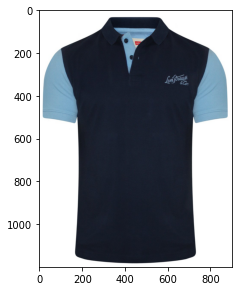

In [97]:
import urllib
w=30
h=10
fig=plt.figure(figsize=(20, 10))
rows=int(len(data['url'])/5)+1
columns = 5
for i in range(0, len(data['url'])):
  f = urllib.request.urlopen(data['url'][i])
  a = plt.imread(f,0)
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(a)
plt.show()

In [98]:
JSON_CONTENT_TYPE

'application/json'

In [150]:
input_object=input_fn(request_body, content_type=JSON_CONTENT_TYPE)

In [151]:
input_object['lwsub']

['blue']

In [152]:
import time
then=time.time()
prediction=predict_fn(input_object, learner)
now=time.time()


'blue'


In [153]:
prediction

{'Status': 'Success',
 'index': ['/content/drive/My Drive/EAST/Fashion_Data/inf_img/13782.jpg',
  '/content/drive/My Drive/EAST/Fashion_Data/inf_img/10066.jpg',
  '/content/drive/My Drive/EAST/Fashion_Data/inf_img/32644.jpg',
  '/content/drive/My Drive/EAST/Fashion_Data/inf_img/22632.jpg',
  '/content/drive/My Drive/EAST/Fashion_Data/inf_img/26166.jpg'],
 'method': 'QA',
 'multilabel_output': [164, 60, 148, 114, 104],
 'scores': [0.6710314750671387,
  0.6173495650291443,
  0.6097106337547302,
  0.6004024147987366,
  0.596357524394989]}

In [154]:
print(now-then)

0.19890666007995605


In [ ]:
prediction['index']=[post_process(x) for x in prediction['index']]
prediction['index']

In [155]:
prediction['index']

['/content/drive/My Drive/EAST/Fashion_Data/inf_img/13782.jpg',
 '/content/drive/My Drive/EAST/Fashion_Data/inf_img/10066.jpg',
 '/content/drive/My Drive/EAST/Fashion_Data/inf_img/32644.jpg',
 '/content/drive/My Drive/EAST/Fashion_Data/inf_img/22632.jpg',
 '/content/drive/My Drive/EAST/Fashion_Data/inf_img/26166.jpg']

Populating the interactive namespace from numpy and matplotlib


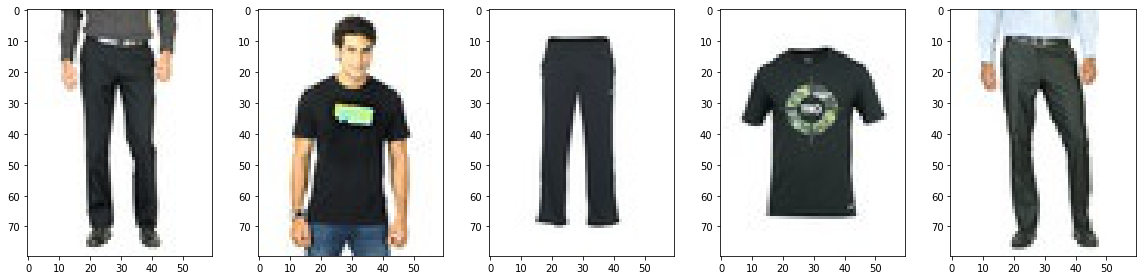

In [158]:
import urllib
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

w=30
h=10
fig=plt.figure(figsize=(20, 10))
rows=int(len(prediction['index'])/5)+1
columns = 5
for i in range(0, len(prediction['index'])):
  f = prediction['index'][i]
  #req=urllib.request.Request(prediction['index'][i], headers=hdr)
  #f = urllib.request.urlopen(req)
  a = plt.imread(f,0)
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(a)
plt.show()